In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


#### Load Dataset

In [6]:
df = pd.read_csv("../data/benin-malanville.csv")
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


#### Summary Statistics and Missing Value Report

In [ ]:
# Summary statistics - numeric
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [10]:
# Missing value count
missing_report = df.isna().sum()
print(missing_report)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [11]:
missing_percent = (missing_report / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_report, 'Missing %': missing_percent})
missing_df[missing_df['Missing %'] > 5]  # Highlight columns with >5% missing

,Missing Count,Missing %
Comments,525600,100.0


#### Outlier Detection and Basic Cleaning

##### Z-score for outliers

In [14]:
from scipy.stats import zscore

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)
outliers = (np.abs(z_scores) > 3)
df_outliers = df[outliers.any(axis=1)]
print(f"Outliers count: {len(df_outliers)}")


Outliers count: 7740


##### Drop or Impute Missing Values

In [15]:
# Drop rows with missing GHI/DNI/DHI or fill using median
for col in columns_to_check:
    df[col] = df[col].fillna(df[col].median())

##### Export Cleaned Data

In [18]:
df.to_csv('../data/benin_clean.csv', index=False)

#### Timeseries Analysis

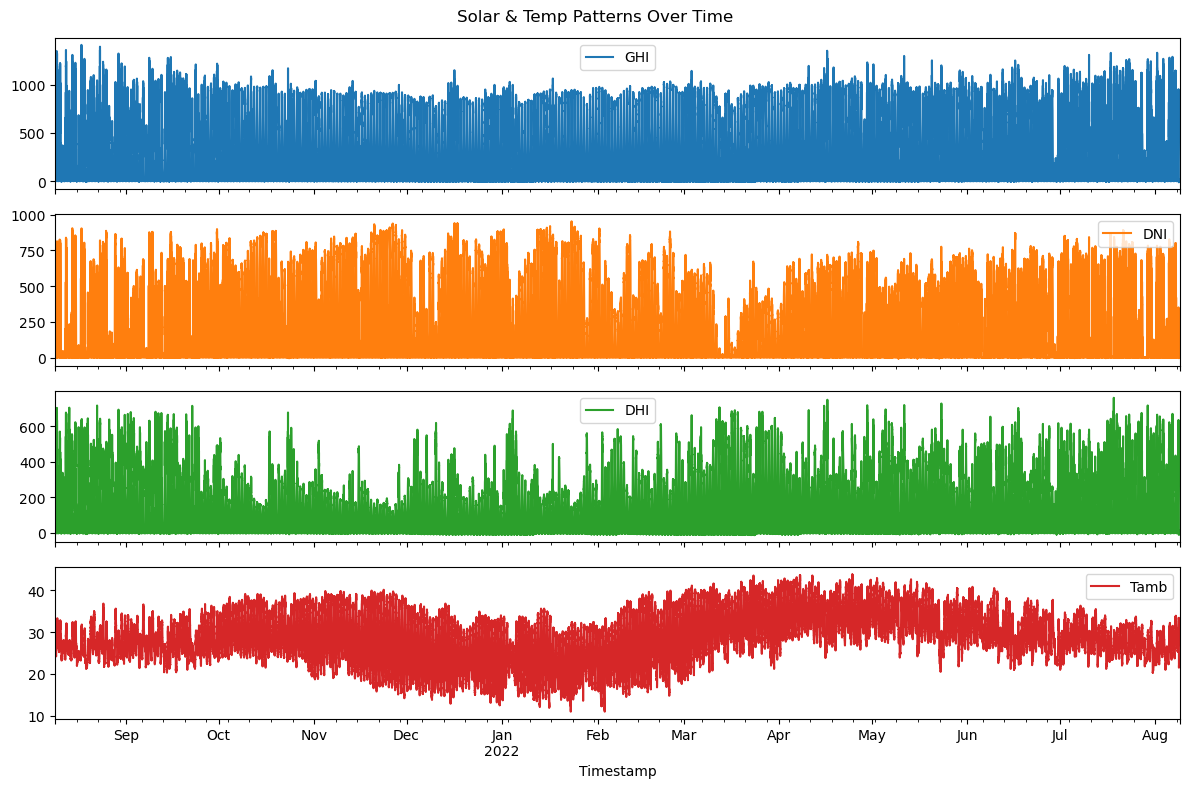

In [19]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(subplots=True, figsize=(12, 8), title='Solar & Temp Patterns Over Time')
plt.tight_layout()
plt.show()

#### Cleaning Impact

In [21]:
# Compare sensor data before and after cleaning
df['Cleaning'] = df['Cleaning'].fillna(0)
df['Cleaning'] = df['Cleaning'].astype(int)

pre_clean = df[df['Cleaning'] == 0][['ModA', 'ModB']].mean()
post_clean = df[df['Cleaning'] == 1][['ModA', 'ModB']].mean()

print("Pre-clean average:")
print(pre_clean)
print()
print("Post-clean average:")
print(post_clean)


Pre-clean average:
ModA    236.524253
ModB    228.816071
dtype: float64

Post-clean average:
ModA    307.229278
ModB    301.972165
dtype: float64


#### Correlation and Rekationship Analysis

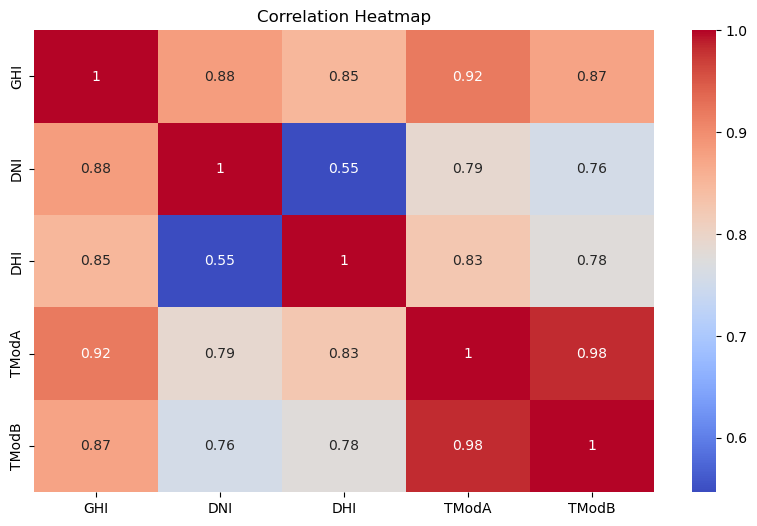

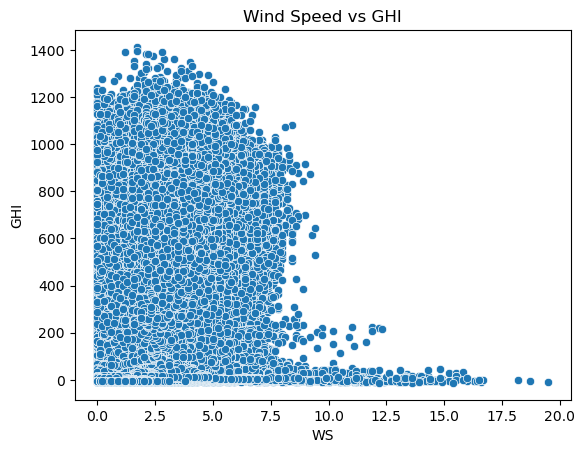

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot: Wind speed vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title("Wind Speed vs GHI")
plt.show()


##### Wind and Distribution Analysis

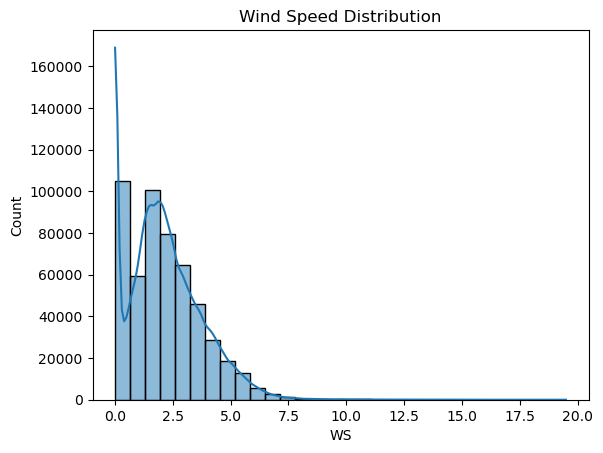

In [24]:
# Wind histograms
sns.histplot(df['WS'], bins=30, kde=True)
plt.title("Wind Speed Distribution")
plt.show()

##### Temperature and Humidity Analysis

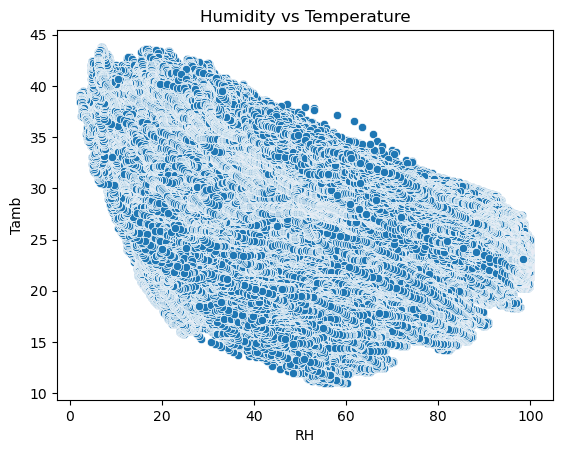

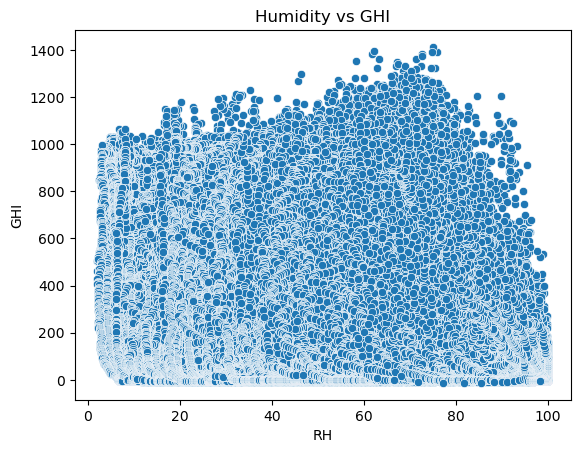

In [25]:
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("Humidity vs Temperature")
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df)
plt.title("Humidity vs GHI")
plt.show()

##### Bubble Chart

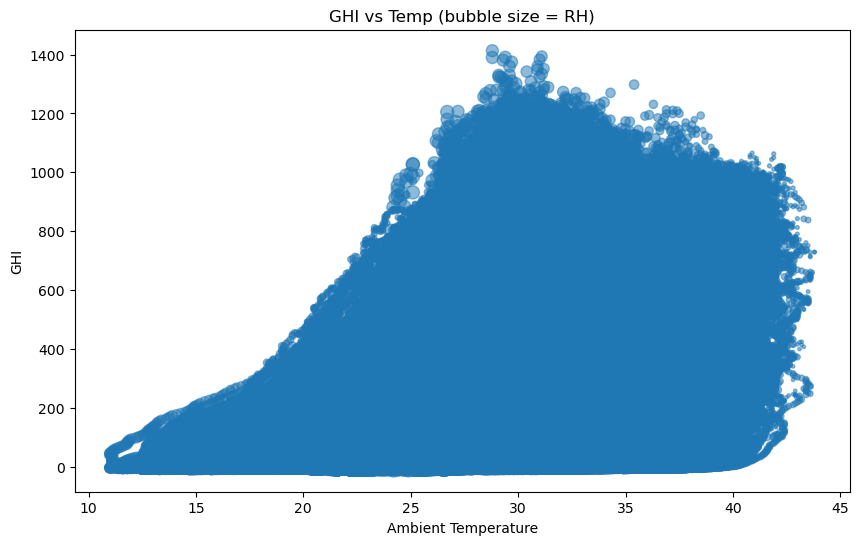

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH'], alpha=0.5)
plt.xlabel('Ambient Temperature')
plt.ylabel('GHI')
plt.title('GHI vs Temp (bubble size = RH)')
plt.show()